## Observations and Insights 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata, study_results, how = "outer", on="Mouse ID")
# Display the data table for preview
mouse_results_df.sort_values(["Mouse ID", "Timepoint"])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice.
num_mice = len(mouse_results_df["Mouse ID"].unique())
print(f'The total number of mice in the dataset: {num_mice}')

The total number of mice in the dataset: 249


In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

id_timepoint_filter = mouse_results_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")
duplicate_mouse_df = mouse_results_df[id_timepoint_filter]

duplicate_mouse_id = duplicate_mouse_df["Mouse ID"]
duplicate_mouse_id = duplicate_mouse_id.unique()
print(f"The duplicate mouse id's for Mouse ID and Timepoint include: {duplicate_mouse_id}")

The duplicate mouse id's for Mouse ID and Timepoint include: ['g989']


In [55]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep="first", inplace=True)
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [57]:
# Checking the number of mice in the clean DataFrame
num_mice_clean_df = len(mouse_results_df["Mouse ID"].unique())
print(f'The number of mice in the clean DataFrame: {num_mice_clean_df}')

The number of mice in the clean DataFrame: 249


## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groups = mouse_results_df.groupby(["Drug Regimen"])

regimen_mean = regimen_groups["Tumor Volume (mm3)"].mean()
regimen_mean.rename("Tumor Volume (mm3) - Mean", inplace = True)

regimen_median = regimen_groups["Tumor Volume (mm3)"].median()
regimen_median.rename("Tumor Volume (mm3) - Median", inplace = True)

regimen_variance = regimen_groups["Tumor Volume (mm3)"].var()
regimen_variance.rename("Tumor Volume (mm3) - VAR", inplace = True)

regimen_std = regimen_groups["Tumor Volume (mm3)"].std()
regimen_std.rename("Tumor Volume - STD", inplace = True)

regimen_sem = regimen_groups["Tumor Volume (mm3)"].sem()
regimen_sem.rename("Tumor Volume (mm3) - SEM", inplace = True)

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_sum_stats_df = pd.concat([regimen_mean, regimen_median, regimen_variance, regimen_std, regimen_sem], axis = 1)
regimen_sum_stats_df


,Tumor Volume (mm3) - Mean,Tumor Volume (mm3) - Median,Tumor Volume (mm3) - VAR,Tumor Volume - STD,Tumor Volume (mm3) - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
mouse_results_df2 = mouse_results_df
regimen_groups2 = mouse_results_df2.groupby(["Drug Regimen"])

mouse_results_df2 = regimen_groups2["Tumor Volume (mm3)"].describe()
mouse_results_df2.drop(columns = ["count", "25%", "50%", "75%", "max", "min"], inplace = True)

#Add additional summary statistics columns
mouse_results_df2["Tumor Volume (mm3) - Median"] = regimen_groups2["Tumor Volume (mm3)"].median()
mouse_results_df2["Tumor Volume (mm3) - VAR"] = regimen_groups2["Tumor Volume (mm3)"].var()
mouse_results_df2["Tumor Volume (mm3) - SEM"] = regimen_groups2["Tumor Volume (mm3)"].sem()

# Rename first two columns
mouse_results_df2.rename(columns = {"mean" : "Tumor Volume (mm3) - Mean", "std" : "Tumor Volume (mm3) - STD"}, inplace = True)
# # Reorder columns
mouse_results_df2 = mouse_results_df2[["Tumor Volume (mm3) - Mean","Tumor Volume (mm3) - Median",
                                       "Tumor Volume (mm3) - VAR","Tumor Volume (mm3) - STD","Tumor Volume (mm3) - SEM"]]
mouse_results_df2

,Tumor Volume (mm3) - Mean,Tumor Volume (mm3) - Median,Tumor Volume (mm3) - VAR,Tumor Volume (mm3) - STD,Tumor Volume (mm3) - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

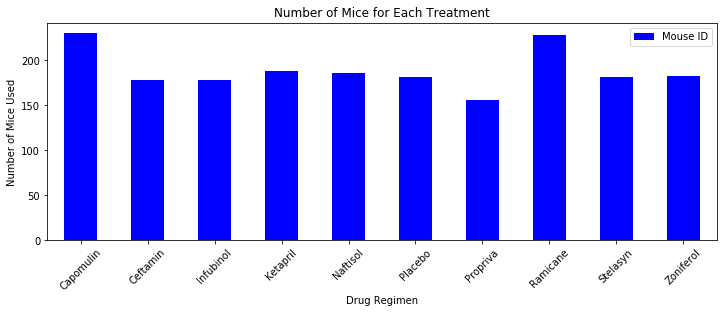

In [132]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
plot_mice_df = regimen_groups["Mouse ID"].count()
plot_mice_df =pd.DataFrame(plot_mice_df)
plot_mice_df

#Use pandas to plot the bar chart
mice_used_plot = plot_mice_df.plot(kind="bar", figsize=(12,4), use_index=True, color="blue")

#Set the titles and labels
mice_used_plot.set_xticklabels(plot_mice_df.index, rotation=45)
mice_used_plot.set_xlabel("Drug Regimen")
mice_used_plot.set_ylabel("Number of Mice Used")
mice_used_plot.set_title("Number of Mice for Each Treatment")

plt.show()

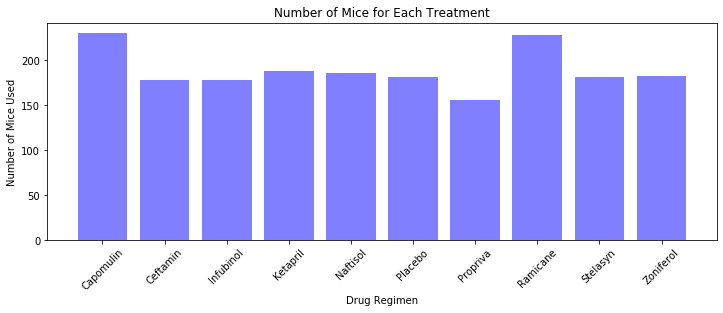

In [135]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plot_mice_df = regimen_groups["Mouse ID"].count()
plot_mice_df =pd.DataFrame(plot_mice_df)
plot_mice_df

x_axis = np.arange(len(plot_mice_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,4))
#Use pyplot to plot the bar chart
plt.bar(x_axis, plot_mice_df["Mouse ID"], color="blue", alpha=.5, align = "center")

#Set the titles and labels
plt.xticks(tick_locations, plot_mice_df.index.values, rotation=45)
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Used")

plt.savefig("Images/Mice_used_by_treatments.png")
plt.show()

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
